Found 1438 images belonging to 30 classes.


c:\Users\Devikamallikarjun\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


45/45 ━━━━━━━━━━━━━━━━━━━━ 18s 366ms/step


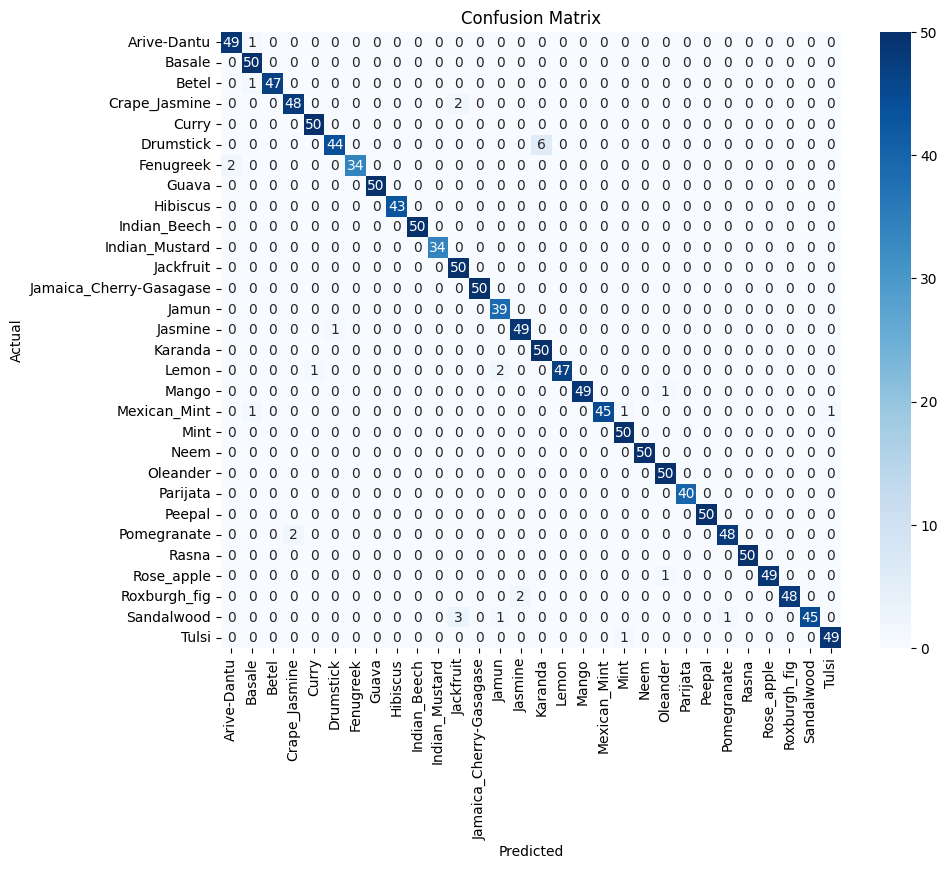

                         precision    recall  f1-score   support

            Arive-Dantu       0.96      0.98      0.97        50
                 Basale       0.94      1.00      0.97        50
                  Betel       1.00      0.98      0.99        48
          Crape_Jasmine       0.96      0.96      0.96        50
                  Curry       0.98      1.00      0.99        50
              Drumstick       0.98      0.88      0.93        50
              Fenugreek       1.00      0.94      0.97        36
                  Guava       1.00      1.00      1.00        50
               Hibiscus       1.00      1.00      1.00        43
           Indian_Beech       1.00      1.00      1.00        50
         Indian_Mustard       1.00      1.00      1.00        34
              Jackfruit       0.91      1.00      0.95        50
Jamaica_Cherry-Gasagase       1.00      1.00      1.00        50
                  Jamun       0.93      1.00      0.96        39
                Jasmine 

In [1]:


import numpy as np
import os
import tensorflow as tf
import seaborn as sns
import json
from sklearn.metrics import classification_report, confusion_matrix
from keras.preprocessing import image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from collections import Counter



model = tf.keras.models.load_model('medicinal_plant_identification_model.keras')

with open('class_indices.json', 'r') as f:
    class_indices = json.load(f)
    class_labels = {v: k for k, v in class_indices.items()}


medicinal_properties = {
        'Arive-Dantu': {
        'Common Name': 'Arive Dantu',
        'Scientific Name': 'Amaranthus tristis',
        'Medicinal Properties': 'Rich in vitamins and minerals, used in traditional medicine to treat inflammation and anemia.',
        'Allergies': 'May cause allergic reactions in sensitive individuals.'
    },
    'Basale': {
        'Common Name': 'Malabar Spinach',
        'Scientific Name': 'Basella alba',
        'Medicinal Properties': 'High in vitamins A and C, used to treat diarrhea and anemia.',
        'Allergies': 'Generally considered safe, but may cause allergies in rare cases.'
    },
    'Crape_Jasmine': {
        'Common Name': 'Crape Jasmine',
        'Scientific Name': 'Tabernaemontana divaricata',
        'Medicinal Properties': 'Used in traditional medicine to treat fever, pain, and inflammation.',
        'Allergies': 'Can cause skin irritation in some individuals.'
    },
    'Curry': {
        'Common Name': 'Curry Leaf',
        'Scientific Name': 'Murraya koenigii',
        'Medicinal Properties': 'Used to treat diabetes, infections, and hair loss.',
        'Allergies': 'Rare, but possible allergic reactions include skin rash and itching.'
    },
    'Drumstick': {
        'Common Name': 'Moringa',
        'Scientific Name': 'Moringa oleifera',
        'Medicinal Properties': 'Rich in nutrients, used to treat malnutrition, inflammation, and infections.',
        'Allergies': 'Generally safe, but may cause gastrointestinal issues in some people.'
    },
    'Fenugreek': {
        'Common Name': 'Fenugreek',
        'Scientific Name': 'Trigonella foenum-graecum',
        'Medicinal Properties': 'Used to treat digestive problems, inflammation, and diabetes.',
        'Allergies': 'Can cause allergic reactions including nasal congestion, coughing, and wheezing.'
    },
    'Guava': {
        'Common Name': 'Guava',
        'Scientific Name': 'Psidium guajava',
        'Medicinal Properties': 'High in vitamin C, used to treat diarrhea, diabetes, and high blood pressure.',
        'Allergies': 'Rare, but can cause allergic reactions in some individuals.'
    },
    'Betel': {
        'Common Name': 'Betel',
        'Scientific Name': 'Piper betle',
        'Medicinal Properties': 'Used to treat digestive issues, respiratory problems, and skin infections',
        'Allergies': 'May cause allergic reactions, particularly in people with allergies to Piper species.'
    },
    'Hibiscus': {
        'Common Name': 'Hibiscus',
        'Scientific Name': 'Hibiscus rosa-sinensis',
        'Medicinal Properties': 'Used to treat high blood pressure, cholesterol, and digestive issues.',
        'Allergies': 'May cause dermatitis in some individuals.'
    },
    'Indian_Beech': {
        'Common Name': 'Pongamia',
        'Scientific Name': 'Millettia pinnata',
        'Medicinal Properties': 'Used to treat skin diseases, wounds, and inflammation.',
        'Allergies': 'May cause skin irritation and allergic reactions.'
    },
    'Indian_Mustard': {
        'Common Name': 'Mustard',
        'Scientific Name': 'Brassica juncea',
        'Medicinal Properties': 'Used to treat muscle pain, arthritis, and respiratory issues.',
        'Allergies': 'Can cause allergic reactions, particularly in people with mustard allergies.'
    },
    'Jackfruit': {
        'Common Name': 'Jackfruit',
        'Scientific Name': 'Artocarpus heterophyllus',
        'Medicinal Properties': 'Rich in vitamins and antioxidants, used to boost immunity and treat skin problems.',
        'Allergies': 'Can cause allergic reactions in people allergic to birch pollen.'
    },
    'Jamaica_Cherry-Gasagase': {
        'Common Name': 'Jamaica Cherry',
        'Scientific Name': 'Muntingia calabura',
        'Medicinal Properties': 'Used to treat respiratory problems, fever, and headaches.',
        'Allergies': 'Generally considered safe, but potential for allergic reactions exists.'
    },
    'Jamun': {
        'Common Name': 'Jamun',
        'Scientific Name': 'Syzygium cumini',
        'Medicinal Properties': 'Used to treat diabetes, digestive disorders, and skin problems.',
        'Allergies': 'Rare, but possible allergic reactions include skin rash and itching.'
    },
    'Jasmine': {
        'Common Name': 'Jasmine',
        'Scientific Name': 'Jasminum',
        'Medicinal Properties': 'Used to treat stress, anxiety, and skin problems.',
        'Allergies': 'Can cause allergic reactions, particularly in people with pollen allergies.'
    },
    'Karanda': {
        'Common Name': 'Carissa',
        'Scientific Name': 'Carissa carandas',
        'Medicinal Properties': 'Used to treat anemia, diarrhea, and fever.',
        'Allergies': 'Generally considered safe, but may cause allergic reactions in some individuals.'
    },
    'Lemon': {
        'Common Name': 'Lemon',
        'Scientific Name': 'Citrus limon',
        'Medicinal Properties': 'High in vitamin C, used to treat scurvy, digestion issues, and skin problems.',
        'Allergies': 'Can cause allergic reactions, particularly in people with citrus allergies.'
    },
    'Mango': {
        'Common Name': 'Mango',
        'Scientific Name': 'Mangifera indica',
        'Medicinal Properties': 'Rich in vitamins and antioxidants, used to boost immunity and improve digestion.',
        'Allergies': 'Can cause allergic reactions, particularly in people allergic to latex.'
    },
    'Mexican_Mint': {
        'Common Name': 'Indian Borage',
        'Scientific Name': 'Plectranthus amboinicus',
        'Medicinal Properties': 'Used to treat respiratory issues, digestive problems, and skin infections.',
        'Allergies': 'Generally considered safe, but potential for allergic reactions exists.'
    },
    'Mint': {
        'Common Name': 'Mint',
        'Scientific Name': 'Mentha',
        'Medicinal Properties': 'Used to treat digestive issues, headaches, and respiratory problems.',
        'Allergies': 'Can cause allergic reactions, particularly in people with pollen allergies.'
    },
    'Neem': {
        'Common Name': 'Neem',
        'Scientific Name': 'Azadirachta indica',
        'Medicinal Properties': 'Used to treat skin diseases, infections, and inflammation.',
        'Allergies': 'May cause skin irritation and allergic reactions.'
    },
    'Oleander': {
        'Common Name': 'Oleander',
        'Scientific Name': 'Nerium oleander',
        'Medicinal Properties': 'Used in traditional medicine to treat heart problems and skin conditions.',
        'Allergies': 'Highly toxic, can cause severe allergic reactions and poisoning.'
    },
    'Parijata': {
        'Common Name': 'Night-Flowering Jasmine',
        'Scientific Name': 'Nyctanthes arbor-tristis',
        'Medicinal Properties': 'Used to treat fever, cough, and arthritis.',
        'Allergies': 'Generally considered safe, but potential for allergic reactions exists.'
    },
    'Peepal': {
        'Common Name': 'Sacred Fig',
        'Scientific Name': 'Ficus religiosa',
        'Medicinal Properties': 'Used to treat asthma, diabetes, and digestive issues.',
        'Allergies': 'Can cause allergic reactions, particularly in people with fig allergies.'
    },
    'Pomegranate': {
        'Common Name': 'Pomegranate',
        'Scientific Name': 'Punica granatum',
        'Medicinal Properties': 'Rich in antioxidants, used to treat heart disease, inflammation, and infections.',
        'Allergies': 'Generally considered safe, but may cause allergic reactions in some individuals.'
    },
    'Rasna': {
        'Common Name': 'Vanda Orchid',
        'Scientific Name': 'Vanda tessellata',
        'Medicinal Properties': 'Used to treat rheumatism, asthma, and urinary disorders.',
        'Allergies': 'Generally considered safe, but potential for allergic reactions exists.'
    },
    'Rose_apple': {
        'Common Name': 'Rose Apple',
        'Scientific Name': 'Syzygium jambos',
        'Medicinal Properties': 'Used to treat diabetes, infections, and digestive issues.',
        'Allergies': 'Generally considered safe, but potential for allergic reactions exists.'
    },
    'Roxburgh_fig': {
        'Common Name': 'Roxburgh Fig',
        'Scientific Name': 'Ficus auriculata',
        'Medicinal Properties': 'Used to treat diabetes, skin diseases, and digestive issues.',
        'Allergies': 'Generally considered safe, but potential for allergic reactions exists.'
    },
    'Sandalwood': {
        'Common Name': 'Sandalwood',
        'Scientific Name': 'Santalum album',
        'Medicinal Properties': 'Used to treat skin problems, stress, and inflammation.',
        'Allergies': 'Generally considered safe, but may cause allergic reactions in some individuals.'
    },
    'Tulsi': {
        'Common Name': 'Holy Basil',
        'Scientific Name': 'Ocimum sanctum',
        'Medicinal Properties': 'Used to treat respiratory issues, stress, and infections.',
        'Allergies': 'Generally considered safe, but potential for allergic reactions exists.'
    }


}

                                                                                                             



def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    'val', 
    target_size=(224, 224), 
    batch_size=32, 
    class_mode='categorical', 
    shuffle=False
)

y_true = val_generator.classes
y_pred = np.argmax(model.predict(val_generator), axis=-1)

plot_confusion_matrix(y_true, y_pred, list(class_labels.values()))
print(classification_report(y_true, y_pred, target_names=list(class_labels.values())))


def verify_class_inclusion(data_dir, class_name):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.exists(class_dir) and len(os.listdir(class_dir)) > 0:
        print(f"{class_name} images found in {data_dir}.")
    else:
        print(f"{class_name} images NOT found in {data_dir}.")

train_dir = 'train'
val_dir = 'val'
verify_class_inclusion(train_dir, 'Roxburgh_fig')
verify_class_inclusion(val_dir, 'Roxburgh_fig')


def check_class_balance(data_dir):
    class_counts = Counter()
    for class_name in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, class_name)
        if os.path.isdir(class_dir):
            class_counts[class_name] = len(os.listdir(class_dir))
    return class_counts

train_class_counts = check_class_balance(train_dir)
val_class_counts = check_class_balance(val_dir)
print("Training set class distribution:", train_class_counts)
print("Validation set class distribution:", val_class_counts)





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


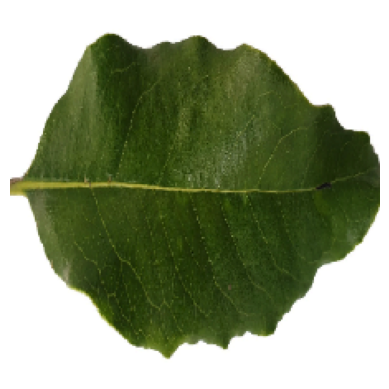

Common Name: Sandalwood
Scientific Name: Santalum album
Medicinal Properties: Used to treat skin problems, stress, and inflammation.
Allergies: Generally considered safe, but may cause allergic reactions in some individuals.


In [4]:


def predict_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)
    class_label = class_labels[predicted_class]
    properties = medicinal_properties.get(class_label, {"Common Name": "Unknown", "Scientific Name": "Unknown",
                                                         "Medicinal Properties": "No properties available", "Allergies": "No information available"})
    return img, class_label, properties

class_name = ['Arive-Dantu','Basale','Basale','Crape_Jasmine','Crape_Jasmine','Curry',
                      'Curry','Drumstick','Fenugreek','Guava','Hibiscus','Indian_Beech','Indian_Mustard','Jackfruit','Jamaica_Cherry-Gasagase','Jamun',
                      'Jasmine','Karanda','Lemon','Mango','Mexican_Mint','Mint','Neem','Oleander',
                      'Parijata','Peepal','Pomegranate','Rasna','Rose_apple','Roxburgh_fig',
                      'Sandalwood','Tulsi'
                      ]
if __name__ == "__main__":
    image_path = r'test\Sandalwood\__5_7012907.png'
    img, prediction, properties = predict_image(image_path)
    
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    print(f"Common Name: {properties['Common Name']}")
    print(f"Scientific Name: {properties['Scientific Name']}")
    print(f"Medicinal Properties: {properties['Medicinal Properties']}")
    print(f"Allergies: {properties['Allergies']}")
